### Import all necessary libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

# print the version of libraries
print("Tensorflow:", tf.__version__)
print("Keras:",keras.__version__)
print("Numpy: ", np.__version__)


Tensorflow: 2.0.0
Keras: 2.3.1
Numpy:  1.17.2


The data i used for this project was downloaded from kaggle dataset

link ---> https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset

##### since we have enought training and validation images it is not necessary to do image augmentation ......

In [2]:
train_datagen = ImageDataGenerator(rescale = 1 / 255.0                                   )

valid_datagen = ImageDataGenerator(rescale = 1 / 255.0,
                                  rotation_range = 40,
                                  width_shift_range = 0.3,
                                  shear_range = 0.2,
                                  zoom_range = 0.3,
                                  horizontal_flip = True)

In [3]:
#specifying input shape for our network
input_shape = (200,200)
train_dataset = train_datagen.flow_from_directory('dataset/Train',
                                                 target_size= input_shape,
                                                 batch_size= 30,
                                                 shuffle= True,
                                                 class_mode= 'binary')

valid_dataset = valid_datagen.flow_from_directory('dataset/Validation',
                                                 target_size= input_shape,
                                                 batch_size= 30,
                                                 shuffle= True,
                                                 class_mode= 'binary')




Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


### Visualize validation images after data augmentation

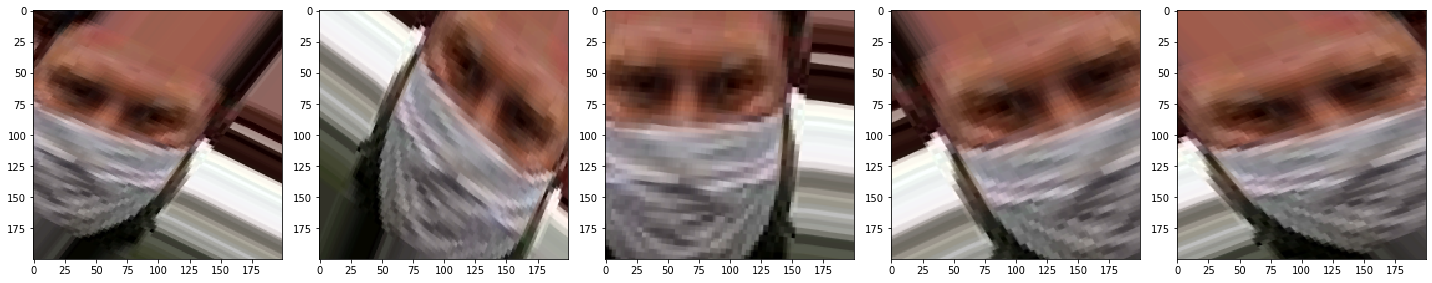

In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
# showing augmented images
images = [valid_dataset[0][0][6] for i in range(5)]
plotImages(images)    
    

## Our CNN model

In [7]:
model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(4,4)),
                                 
                                    keras.layers.Conv2D(filters=64, kernel_size=4),
                                    keras.layers.MaxPooling2D(pool_size=(3,3)),
                                 
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),  
                                    keras.layers.MaxPooling2D(pool_size=(2,2)), 
    
                                                                    
                                    
                                                                        
                                    keras.layers.Flatten(), 
                                    keras.layers.Dense(units=256, activation='relu'), 
                                    keras.layers.Dropout(0.5),                                    
                                    keras.layers.Dense(units=512, activation='relu'),      
                                    keras.layers.Dropout(0.5),
                                                                        
                                    keras.layers.Dense(units=1, activation='sigmoid') 
])

In [8]:
# get information about our model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 196, 196, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)        

### Compilation

In [9]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'binary_crossentropy', 
             metrics=['accuracy'])

### To save the model with best validation accuracy

In [10]:
model_path = 'yes_model2.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_path,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)



### Training our model

In [12]:
EPOCHS = 10
VALIDATION_DATA = valid_dataset
VERBOSE = 2
BATCH_SIZE = 32
STEP_PER_EPOCH = len(train_dataset) / BATCH_SIZE
# training model
history = model.fit(train_dataset, verbose= VERBOSE,
                    epochs=EPOCHS, steps_per_epoch=STEP_PER_EPOCH, validation_data= VALIDATION_DATA,
                    callbacks = [checkpoint])

Epoch 1/10
 - 102s - loss: 0.6156 - accuracy: 0.7152 - val_loss: 0.6906 - val_accuracy: 0.5512
Epoch 2/10


/home/.local/lib/python3.7/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


 - 98s - loss: 0.5256 - accuracy: 0.8030 - val_loss: 0.5205 - val_accuracy: 0.8462
Epoch 3/10
 - 97s - loss: 0.3664 - accuracy: 0.8788 - val_loss: 0.5035 - val_accuracy: 0.8275
Epoch 4/10
 - 100s - loss: 0.2668 - accuracy: 0.9030 - val_loss: 0.2540 - val_accuracy: 0.8650
Epoch 5/10
 - 99s - loss: 0.2700 - accuracy: 0.9152 - val_loss: 0.3358 - val_accuracy: 0.8938
Epoch 6/10
 - 102s - loss: 0.2283 - accuracy: 0.9303 - val_loss: 0.1092 - val_accuracy: 0.9038
Epoch 7/10


KeyboardInterrupt: 